In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
cos=np.cos
sin=np.sin


In [102]:
def basis1(x):
    
    xp1=x[0]
    xp2=x[1]
    xp3=x[2]
    xv1=x[3]
    xv2=x[4]
    xv3=x[5]
    xa1=x[6]
    xa2=x[7]
    xa3=x[8]
    y=[]
    y.append(xa1)
    y.append(sin(xp2)*sin(xp2+xp3)*xa1)
    y.append((sin(xp2)**2)*xa1)
    y.append((sin(xp2+xp3)**2)*xa1)
    y.append(cos(xp2)*xa2)
    y.append(cos(xp2+xp3)*xa2)
    y.append(cos(xp2+xp3)*xa3)
    y.append(sin(xp2)*cos(xp2)*xv1*xv2)
    y.append(sin(xp2)*cos(xp2+xp3)*xv1*xv2)
    y.append(sin(xp2+xp3)*cos(xp2)*xv1*xv2)
    y.append(sin(xp2)*cos(xp2+xp3)*xv1*xv3)
    y.append(sin(xp2+xp3)*cos(xp2+xp3)*xv1*xv2)
    y.append(sin(xp2+xp3)*cos(xp2+xp3)*xv1*xv3)
    y.append(-sin(xp2)*xv2**2)
    y.append(-sin(xp2+xp3)*(xv2+xv3)**2)
    y.append(xv1)
  #  y.append()
  #  y.append()
    return np.asarray(y)

def output1(x,w):
    return np.dot(w,basis1(x))



def basis2(x):
    
    xp1=x[0]
    xp2=x[1]
    xp3=x[2]
    xv1=x[3]
    xv2=x[4]
    xv3=x[5]
    xa1=x[6]
    xa2=x[7]
    xa3=x[8]
    y=[]
    y.append(cos(xp2)*xa1)
    y.append(cos(xp2+xp3)*xa1)
    y.append(xa2)
    y.append(cos(xp3)*xa2)
    y.append(cos(xp3)*xa3)
    y.append(xa3)
    y.append(-sin(xp2)*cos(xp2)*xv1**2)
    y.append(-sin(xp2+xp3)*cos(xp2+xp3)*xv1**2)
    y.append(-sin(xp2)*cos(xp2+xp3)*xv1**2)
    y.append(-sin(xp2+xp3)*cos(xp2)*xv1**2)
    y.append(-sin(xp3)*xv2*xv3)
    y.append(-sin(xp3)*xv3**2)
    y.append(xv2)
    y.append(-sin(xp2))
    y.append(-sin(xp2+xp3))
    
  #  y.append()
  #  y.append()
    return np.asarray(y)

def output2(x,w):
    return np.dot(w,basis2(x))



def basis3(x):
    
    xp1=x[0]
    xp2=x[1]
    xp3=x[2]
    xv1=x[3]
    xv2=x[4]
    xv3=x[5]
    xa1=x[6]
    xa2=x[7]
    xa3=x[8]
    y=[]
    y.append(cos(xp2+xp3)*xa1)
    y.append(xa2)
    y.append(cos(xp3)*xa2)
    y.append(xa3)
    y.append(-sin(xp2+xp3)*cos(xp2+xp3)*xv1**2)
    y.append(-sin(xp2)*cos(xp2+xp3)*xv1**2)
    y.append(sin(xp3)*xv2**2)
    y.append(xv3)
    y.append(-sin(xp2+xp3))
    
    
  #  y.append()
  #  y.append()
    return np.asarray(y)

def output3(x,w):
    return np.dot(w,basis3(x))

In [103]:
w1= np.random.randn(16)
w2= np.random.randn(15)
w3= np.random.randn(9)


In [104]:
output3(x,w3)

0.22563530723666103

In [105]:
x=[1,1,1,1,1,1,1,1,1]
np.dot(w1,basis1(x))

-1.9004357180450961

In [106]:
def train1(gradient,w,x,alpha):
    y=basis1(x)
    for i in range(len(w)):
        w[i]+=alpha*gradient*y[i]
    return w

def train2(gradient,w,x,alpha):
    y=basis2(x)
    for i in range(len(w)):
        w[i]+=alpha*gradient*y[i]
    return w

def train3(gradient,w,x,alpha):
    y=basis3(x)
    for i in range(len(w)):
        w[i]+=alpha*gradient*y[i]
    return w

In [130]:
#PARAMETERS

#positive undefined
A=1
C=3
D=2
E=1
F=2
Ixx=5
Iyy=2
Izz=3
L1=1
L2=1
L3=1
m1=5
m2=5
m3=5

a1=Iyy + m1*A**2+Iyy+m2*(L2-C)**2+Iyy+m3*(L3-D)**2+m3*(L2**2+E**2)
a2=Ixx-Iyy - m2*(L2-C)**2-m3*L2**2
a3=Ixx-Iyy-m3*(L3-D)**2
a4=2*m3*L2*(L3-D)
a7=m3*E*L2
a8=m3*E*(L3-D)
a5= Izz+m2*(L2-C)**2+Izz+m3*(L3-D)**2+m3*L2**2
a6= Izz+m3*(L3-D)**2

g0=9.8

In [108]:
def C1(q):
    return 0.5*np.array([[0,2*a2*np.sin(q[1])*np.cos(q[1])+2*a3*np.sin(q[1]+q[2])*np.cos(q[1]+q[2]), 2*a3*np.sin(q[1]+q[2])*np.cos(q[1]+q[2])-2*a4*np.cos(q[1])*np.sin(q[1]+q[2])],[0, 2*a7-2*a8*np.cos(q[1]+q[2]), -2*a8*np.cos(q[1]+q[2])],[0,-2*a8*np.cos(q[1]+q[2]),-2*a8*np.cos(q[1]+q[2])]])

In [109]:
def c1(q,q_dot):
    return np.dot(q_dot,np.dot(C1(q),q_dot))

In [110]:
def C2(q):
    return 0.5*np.array([[-2*a2*np.sin(q[1])*np.cos(q[1])-2*a3*np.sin(q[1]+q[2])*np.cos(q[1]+q[2])-2*a4*np.sin(q[1])*np.sin(q[1]+q[2]),0,0],[a7*np.cos(q[1])+a3*np.cos(q[1]+q[2]),0,-2*a4*np.sin(q[2])],[a8*np.cos(q[1]+q[2]),0,-2*a4*np.sin(q[2])]])

In [111]:
def c2(q,q_dot):
    return np.dot(q_dot,np.dot(C2(q),q_dot))

In [112]:
def C3(q):
    return 0.5*np.array([[-2*a3*np.sin(q[1]+q[2])*np.cos(q[1]+q[2])+2*a4*np.cos(q[1])*np.sin(q[1]+q[2]),-a8*np.cos(q[1]+q[2]),-a8*np.cos(q[1]+q[2])],[a8*np.cos(q[1]+q[2]),2*a4*np.sin(q[2]),-a4*np.sin(q[2])],[a8*np.cos(q[1]+q[2]),a4*np.sin(q[2]),0]])

In [113]:
def c3(q,q_dot):
    return np.dot(q_dot,np.dot(C3(q),q_dot))

In [114]:
def c(q,q_dot):
    return np.array([c1(q,q_dot), c2(q,q_dot), c3(q,q_dot)])

In [115]:
def B(q):
    return np.array([[a1+a2*np.sin(q[1])**2+a3*np.sin(q[1]+q[2])**2+2*a4*np.cos(q[1])*np.cos(q[1]+q[2]),-a7*np.sin(q[1])-a8*np.sin(q[1]+q[2]), -a8*np.sin(q[1]+q[2])],[-a7*np.sin(q[1])-a8*np.sin(q[1]-q[2]), a5+2*a4*np.cos(q[2]), a6+ a4*np.cos(q[2])], [-a8*np.sin(q[1]+q[2]), a6+a4*np.cos(q[2]), a6]])

In [135]:
def g(q):
    return np.array([0 , m2*g0*(L2/2)*sin(q[1]) , m3*g0*(L3/2)*sin(q[1]+q[2])])

In [117]:
c([1,1,1],[1,1,1])

array([ -6.89864847,  36.5336326 , -14.08446731])

In [134]:
g([0,0,0])

array([  0. ,  24.5,  24.5])

In [119]:
q=x[0:3]
q_dot=x[3:6]

In [120]:
c(q,q_dot)

array([ -6.89864847,  36.5336326 , -14.08446731])

In [121]:
#Timing Law

T=2

def s(t): return -4*np.pi*(t/T)**3 + 6*np.pi*(t/T)**2
def s_dot(t): return (-12*np.pi*(t/T)**2 + 12*np.pi*t/T)/T

#Trajectory
r = np.pi;
def q_d(t): return np.array([r*np.cos(s(t)),r*np.sin(s(t)),r*np.sin(s(t))])
def q_d_dot(t): return np.array([-r*np.sin(s(t))*s_dot(t), r*np.cos(s(t))*s_dot(t),r*np.cos(s(t))*s_dot(t)])

In [122]:
def inv_dyn(q, q_dot, u):
    q=np.asarray(q)
    q_dot=np.asarray(q_dot)
    u=np.asarray(u)
  #  print(np.shape(c(q,q_dot)))
    u=u.reshape((3))
  #  print(np.shape(u))

    q=q.reshape(3)
    q_dot=q_dot.reshape(3)
 #   print(np.shape(u - c(q,q_dot) - g(q)))
#    print(q)
#    print(q_dot)


    q_ddot= np.dot(np.linalg.inv(B(q)), u - c(q,q_dot) - g(q))
 #   print(u - c(q,q_dot))
 #   print(np.shape(q_ddot))
    return np.asarray(q_ddot)

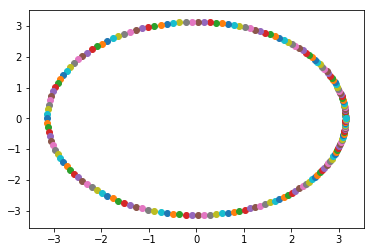

In [123]:
des_joints=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    des_joints.append(q_d(i))
    plt.scatter(q_d(i)[0],q_d(i)[1])
plt.show()
#des_joints

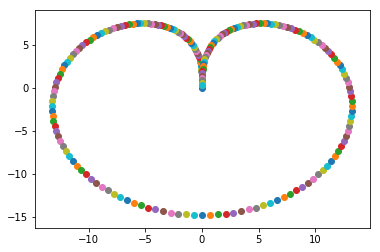

In [124]:
des_vel=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    des_vel.append(q_d_dot(i))
    plt.scatter(q_d_dot(i)[0],q_d_dot(i)[1])
plt.show()
#des_joints

In [125]:
(q_d_dot(0.05)-q_d_dot(0))/0.01

array([  -1.67212141,  144.33327881,  144.33327881])

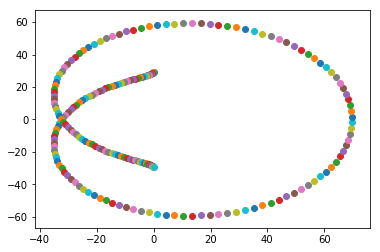

In [126]:
des_acc=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    new_acc=(((q_d_dot(i+0.01))-(q_d_dot(i)))/0.01)
    des_acc.append(new_acc)
    plt.scatter(new_acc[0],new_acc[1])
plt.show()
#des_joints

In [127]:
vel_int=0
for i in range(10):
    
    vel_int+=des_acc[i]*0.01
print(vel_int)
print(des_vel[10])

[-0.12808913  2.80991932  2.80991932]
[-0.12808913  2.80991932  2.80991932]


In [128]:
#Prova a seguire la traiettoria
#manca la feedforward nominale della traiettoria

def run(w1, w2, w3, train, w=0, plot=0, pid=0, clip=0 ):
    mov=[]
    mov_elb=[]
    joints=[]
    q=np.array([3.0,-1.0, 1.0])
    q_dot=np.array([0.0,0.0, 0.0])
    u=np.array([0.01,0.01, 0.])
    
    losses=[]

    kp=500.0
    kd=100.0
    
    u_clip=5000
    
    if train: 
        w1= np.random.randn(16)*0
        w2= np.random.randn(15)*0
        w3= np.random.randn(9)*0
    
    loss= 0
    u_pd1=[]
    u_nn1=[]
    u_pd2=[]
    u_nn2=[]
    u_pd3=[]
    u_nn3=[]
    u_tot1=[]
    u_tot2=[]
    u_tot3=[]
    q_1=[]
    q_2=[]
    q_3=[]
    
    epochs=50
    
    if pid:
        epochs=1
    if not train:
        epochs=1
    
    alpha=0.00001*10
    
    xd_old=np.array([0,0,0,0,0,0,0,0,0])
    xd_new=np.array([0,0,0,0,0,0,0,0,0])
    
    ff_gain=0
    
    for episode in range(epochs):
        print("EPISODE : " + str(episode))
        mov=[]
        mov_elb=[]
        joints=[]
        q=np.array([3.0,1.0, -1.0])
        q_dot=np.array([0.0,0.0, 0.0])
        u=np.array([0.0,0.0, 0.])

        kp=1000.0
        kd=200.0
        loss= 0
        u_clip=5000
        u_pd1=[]
        u_nn1=[]
        u_pd2=[]
        u_nn2=[]
        u_pd3=[]
        u_nn3=[]
        u_tot1=[]
        u_tot2=[]
        u_tot3=[]
        q_1=[]
        q_2=[]
        q_3=[]
        ff1_plt=[]
        ff2_plt=[]
        ff3_plt=[]
        
        for t in range(0,200):

            err=np.array([des_joints[t][0]-q[0],des_joints[t][1]-q[1],des_joints[t][2]-q[2]])
            err_vel=np.array([des_vel[t][0]-q_dot[0],des_vel[t][1]-q_dot[1],des_vel[t][2]-q_dot[2]])

            err=err.reshape((3,1))
            err_vel=err_vel.reshape((3,1))

            xd_new=[des_joints[t][0],des_joints[t][1],des_joints[t][2], des_vel[t][0],des_vel[t][1],des_vel[t][2],des_acc[t][0],des_acc[t][1],des_acc[t][2]]

            ff1=output1(xd_new,w1)
            ff2=output2(xd_new,w2)
            ff3=output3(xd_new,w3)
            
            ff1_plt.append(ff1)
            ff2_plt.append(ff2)
            ff3_plt.append(ff3)
            
          #  err_sum=err.sum()

            ffold=output1(xd_old,w1)

     #       print("ff1  :" + str(ffold))
    
            if train:

                w1=train1(err[0]+err_vel[0],w1,xd_old,alpha*1)
                w2=train2(err[1]+err_vel[1],w2,xd_old,alpha*1)
                w3=train3(err[2]+err_vel[2],w3,xd_old,alpha*1)

      #      print("gradient: " + str(err[0]))
            

            ffold=output1(xd_old,w1)

      #      print("ff1 new  :" + str(ffold))

            xd_old=xd_new


            ff=np.array([[ff1],[ff2],[ff3]])

            if (pid):
                u=kp*err + kd*err_vel
            else:
                u=kp*err + kd*err_vel + ff
      #          print("p {} d {} ff {}".format(kp*err , kd*err_vel , ff))
      #          print("u: "+ str(u))
            u_pd1.append((kp*err + kd*err_vel)[0][0])

            u_pd2.append((kp*err + kd*err_vel)[1][0])

            u_pd3.append((kp*err + kd*err_vel)[2][0])


            if clip:
                for i in range(len(u)):
                    if u[i][0]>u_clip:
                        u[i][0]=u_clip
                    if u[i][0]<-u_clip:
                        u[i][0]=-u_clip

            u_tot1.append(u[0][0])
            u_tot2.append(u[1][0])
            u_tot3.append(u[2][0])


            q_ddot=inv_dyn(q,q_dot,u)

            q_dot=q_dot.reshape((3))

            q_dot+=q_ddot*0.01

            q+= q_dot*0.01

            q_1.append(q[0])
            q_2.append(q[1])
            q_3.append(q[2])



            loss+=np.linalg.norm(err)
       #     loss+=np.linalg.norm(err_vel)*0.2*0

        #    loss+=np.linalg.norm(u)*0.1

        if(plot):
            x_plot=np.linspace(0,2,200)
            x_enum=np.linspace(0,199,200)
            print("Trajectories")
            print("Joint 1")
            plt.plot(np.linspace(0,199,200),q_1, color="blue")
            plt.plot(x_enum,q_d(x_plot)[0], color="red")
            plt.show()
            print("Joint 2")
            plt.plot(np.linspace(0,199,200),q_2, color="blue")
            plt.plot(x_enum,q_d(x_plot)[1], color="red")
            plt.show()
            print("Joint 3")
            plt.plot(np.linspace(0,199,200),q_3, color="blue")
            plt.plot(x_enum,q_d(x_plot)[2], color="red")
            plt.show()


            print("TORQUES JOINT 1")
            plt.plot(np.linspace(0,199,200),u_pd1)
            plt.plot(np.linspace(0,199,200),ff1_plt, color='red')
            plt.plot(np.linspace(0,199,200),u_tot1, color='purple')
            plt.show()
            print("TORQUES JOINT 2")
            plt.plot(np.linspace(0,199,200),u_pd2)
            plt.plot(np.linspace(0,199,200),ff2_plt, color='red')
            plt.plot(np.linspace(0,199,200),u_tot2, color='purple')
            plt.show()
            print("TORQUES JOINT 3")
            plt.plot(np.linspace(0,199,200),u_pd3)
            plt.plot(np.linspace(0,199,200),ff3_plt, color='red')
            plt.plot(np.linspace(0,199,200),u_tot3, color='purple')
            plt.show()

            print("LOSS : " + str(loss))
            losses.append(loss)
          #  if episode>2:
          #      if(losses[-1]-losses[-2])>0:
          #          break
    plt.plot(np.linspace(0,episode,episode+1),losses)
    plt.show()
    return loss,w1,w2,w3

EPISODE : 0
Trajectories
Joint 1


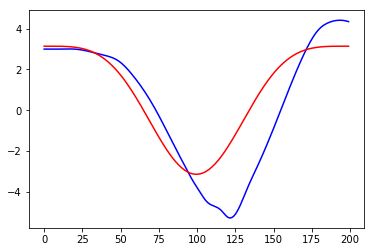

Joint 2


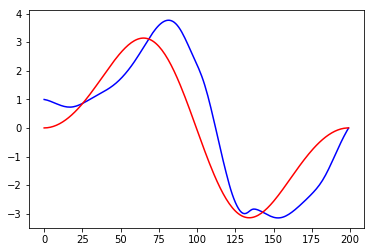

Joint 3


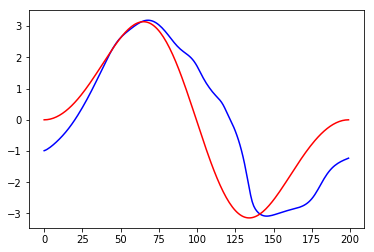

TORQUES JOINT 1


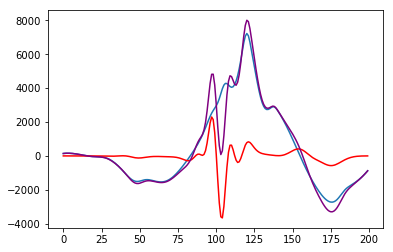

TORQUES JOINT 2


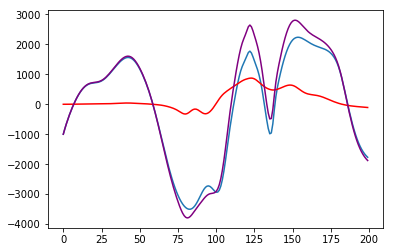

TORQUES JOINT 3


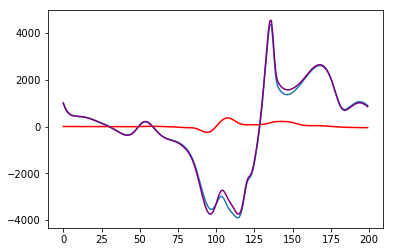

LOSS : 426.291638701
EPISODE : 1
Trajectories
Joint 1


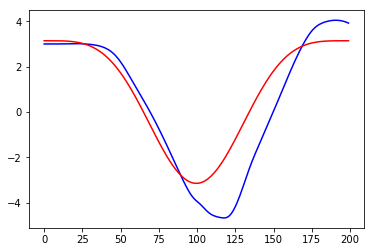

Joint 2


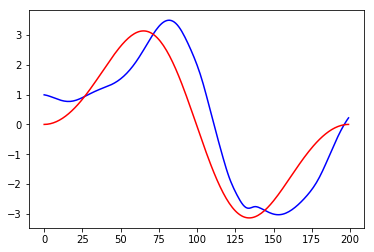

Joint 3


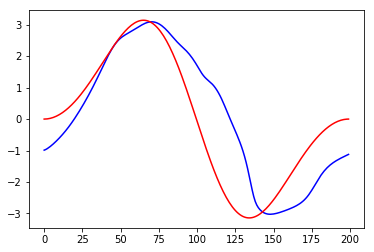

TORQUES JOINT 1


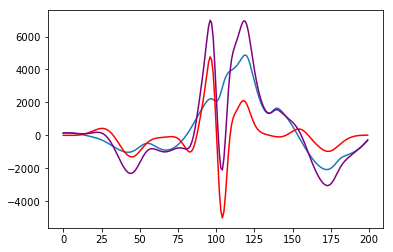

TORQUES JOINT 2


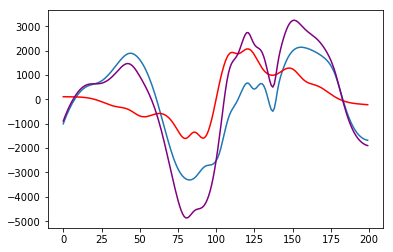

TORQUES JOINT 3


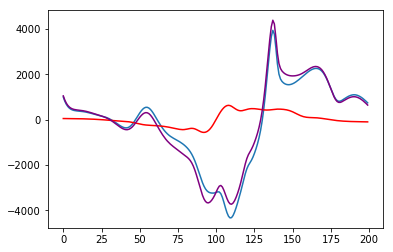

LOSS : 366.284478371
EPISODE : 2
Trajectories
Joint 1


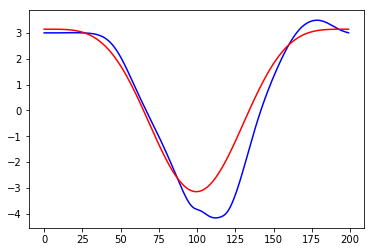

Joint 2


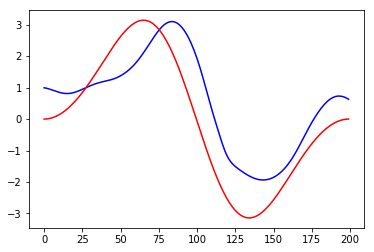

Joint 3


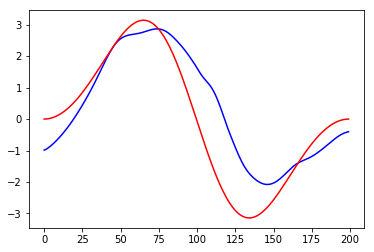

TORQUES JOINT 1


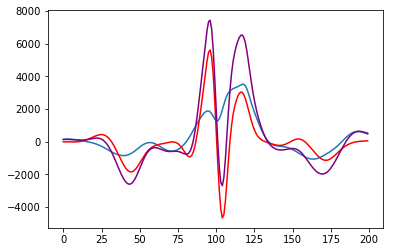

TORQUES JOINT 2


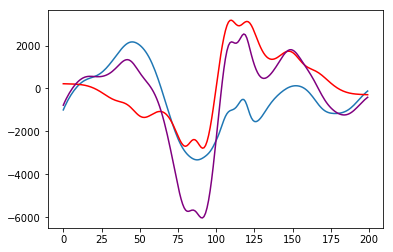

TORQUES JOINT 3


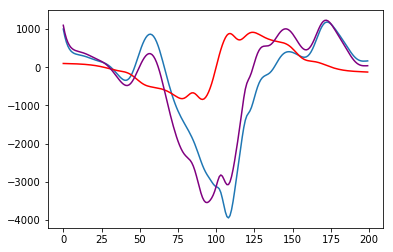

LOSS : 287.635104717
EPISODE : 3
Trajectories
Joint 1


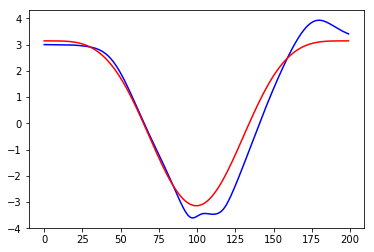

Joint 2


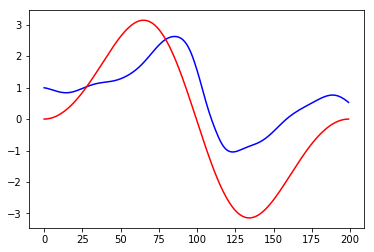

Joint 3


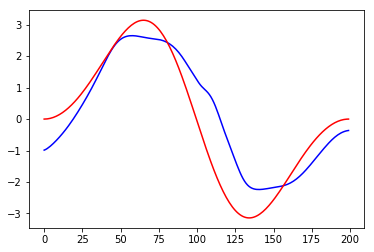

TORQUES JOINT 1


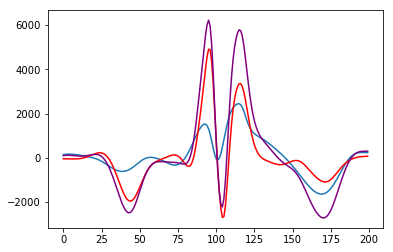

TORQUES JOINT 2


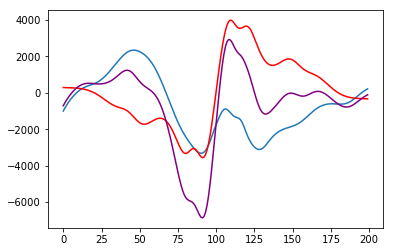

TORQUES JOINT 3


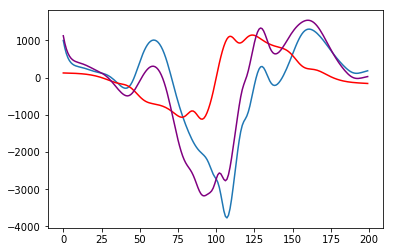

LOSS : 315.01922826
EPISODE : 4
Trajectories
Joint 1


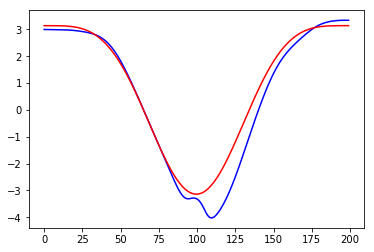

Joint 2


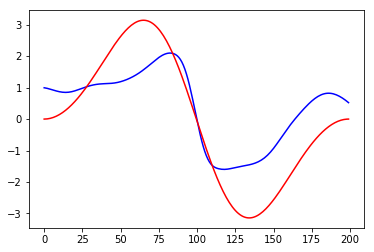

Joint 3


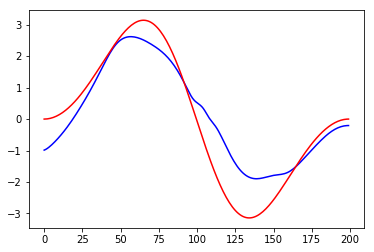

TORQUES JOINT 1


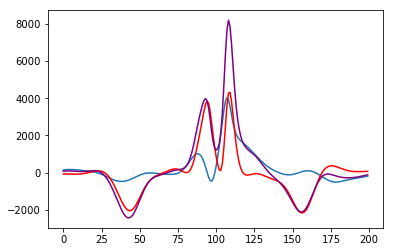

TORQUES JOINT 2


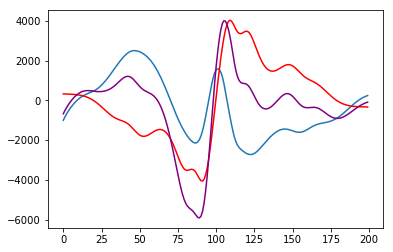

TORQUES JOINT 3


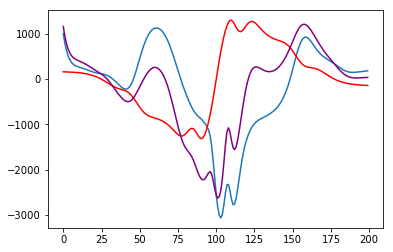

LOSS : 266.816726184
EPISODE : 5
Trajectories
Joint 1


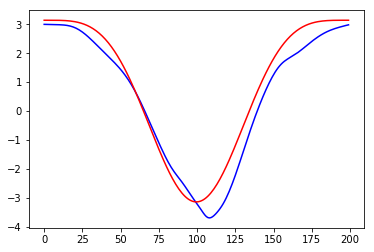

Joint 2


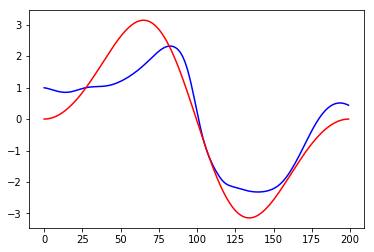

Joint 3


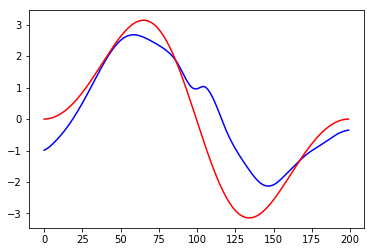

TORQUES JOINT 1


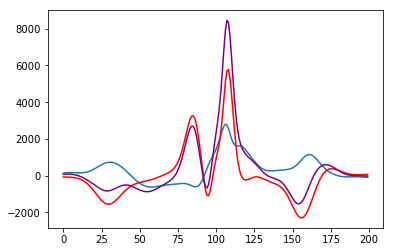

TORQUES JOINT 2


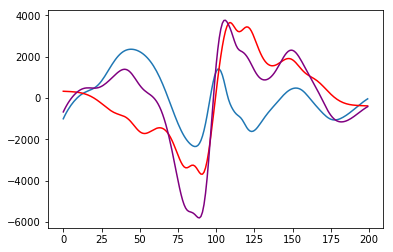

TORQUES JOINT 3


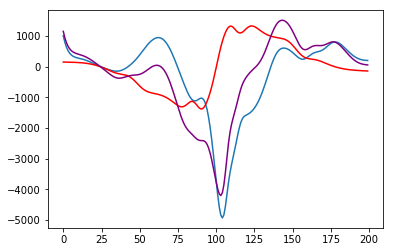

LOSS : 237.934233558
EPISODE : 6
Trajectories
Joint 1


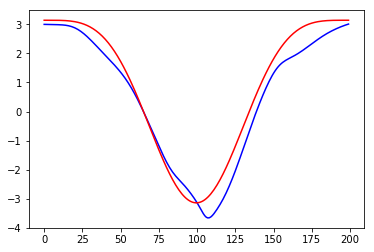

Joint 2


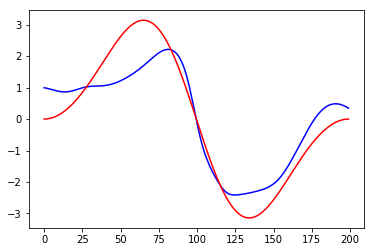

Joint 3


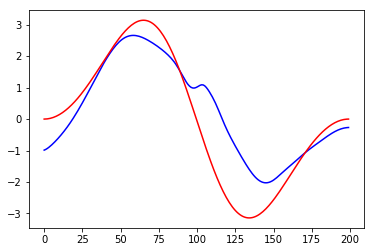

TORQUES JOINT 1


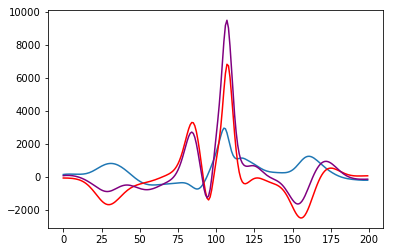

TORQUES JOINT 2


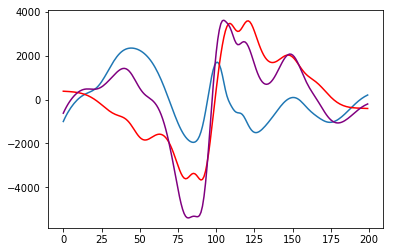

TORQUES JOINT 3


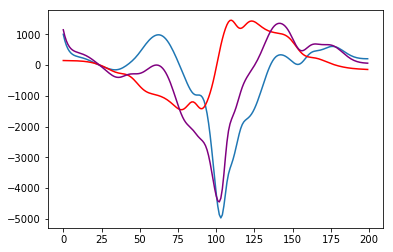

LOSS : 239.51535851
EPISODE : 7
Trajectories
Joint 1


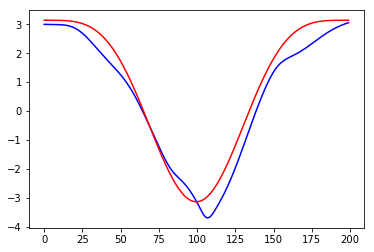

Joint 2


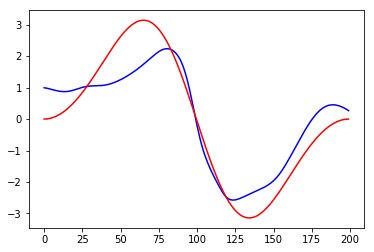

Joint 3


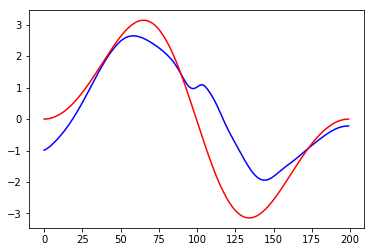

TORQUES JOINT 1


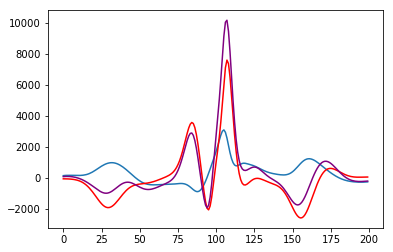

TORQUES JOINT 2


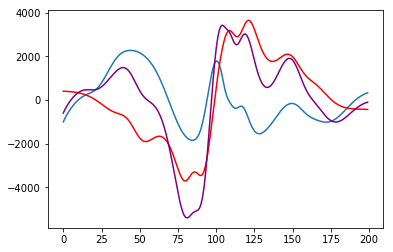

TORQUES JOINT 3


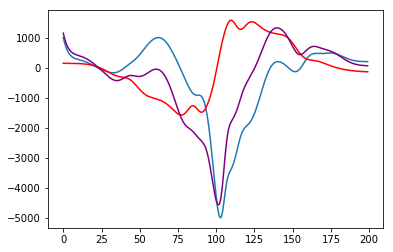

LOSS : 242.612327855
EPISODE : 8
Trajectories
Joint 1


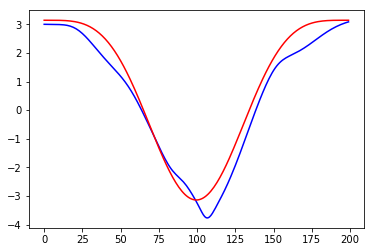

Joint 2


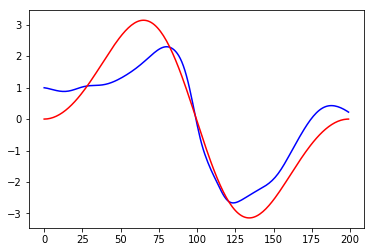

Joint 3


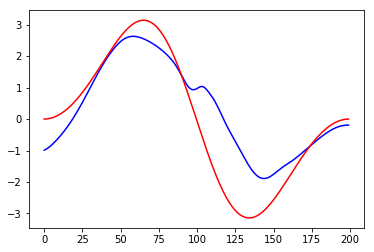

TORQUES JOINT 1


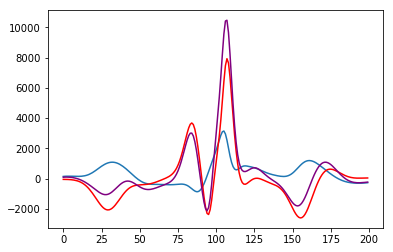

TORQUES JOINT 2


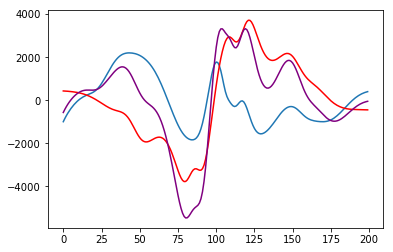

TORQUES JOINT 3


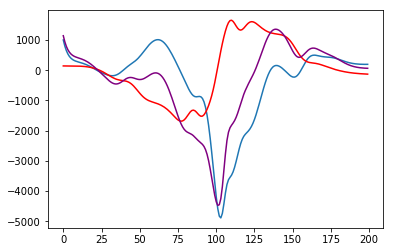

LOSS : 242.544283321
EPISODE : 9
Trajectories
Joint 1


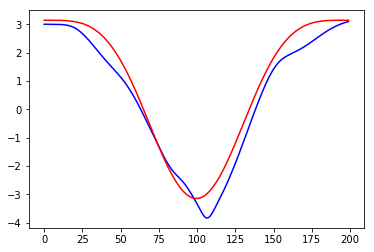

Joint 2


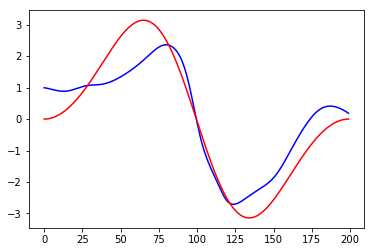

Joint 3


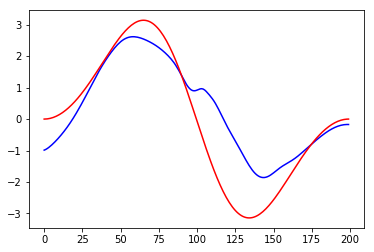

TORQUES JOINT 1


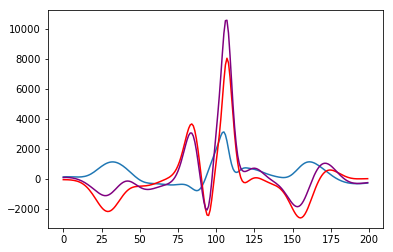

TORQUES JOINT 2


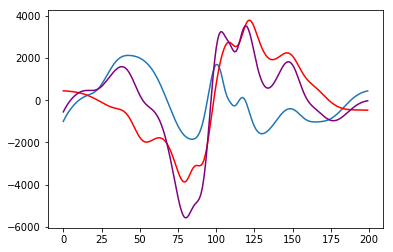

TORQUES JOINT 3


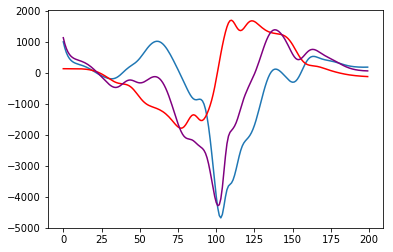

LOSS : 240.85275017
EPISODE : 10
Trajectories
Joint 1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/normand/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-129-5100e7d41a77>", line 1, in <module>
    _,w1,w2,w3= run(0,0,0,train=1, plot=1,pid=0,clip=0)
  File "<ipython-input-128-794e2c84ad23>", line 174, in run
    plt.show()
  File "/Users/normand/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py", line 253, in show
    return _show(*args, **kw)
  File "/Users/normand/anaconda/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py", line 36, in show
    display(figure_manager.canvas.figure)
  File "/Users/normand/anaconda/lib/python3.6/site-packages/IPython/core/display.py", line 164, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/Users/normand/anaconda/lib/python3.6/site-packages/IPython/core/formatters.py", line 145, in format
    data = formatter(obj

KeyboardInterrupt: 

In [129]:
_,w1,w2,w3= run(0,0,0,train=1, plot=1,pid=0,clip=0)

## Trying a new trajectory.

In [ ]:
#Timing Law

T=2

def s(t): return -4*np.pi*(t/T)**3 + 6*np.pi*(t/T)**2
def s_dot(t): return (-12*np.pi*(t/T)**2 + 12*np.pi*t/T)/T

#Trajectory
r = np.pi;
def q_d(t): return np.array([r*np.cos(s(t)),r*np.cos(s(t)),r*np.cos(s(t))])
def q_d_dot(t): return np.array([-r*np.sin(s(t))*s_dot(t), -r*np.sin(s(t))*s_dot(t),-r*np.sin(s(t))*s_dot(t)])

In [ ]:
des_joints=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    des_joints.append(q_d(i))
    plt.scatter(q_d(i)[0],q_d(i)[1])
plt.show()
#des_joints

In [ ]:
des_vel=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    des_vel.append(q_d_dot(i))
    plt.scatter(q_d_dot(i)[0],q_d_dot(i)[1])
plt.show()
#des_joints

In [ ]:
des_acc=[]
for i in range(0,200):
    #100 steps che devono fare due circonferenze, dunque la freq è 2pi/50
    i*=0.01
    new_acc=(((q_d_dot(i+0.01))-(q_d_dot(i)))/0.01)
    des_acc.append(new_acc)
    plt.scatter(new_acc[0],new_acc[1])
plt.show()
#des_joints

In [ ]:
run(w1,w2,w3,train=0,plot=1,pid=1,clip=0)

In [ ]:
run(w1,w2,w3,train=0,plot=1,pid=0,clip=0)